#Trabalho final da disciplina Fundamentos de Data Science
#Uni7-Universidade 7 de Setembro
#Professor Nauber Góis

---


#Alunos
##Francisco Flávio Cardoso Gomes
##Israel Portela
##Jean Carlos Maia

---


# Título - Avaliação de Imóveis
## Dados Utilizados
### DataSet constituido de dados de imóveis em Fortaleza, colhidos entre os anos de 2016 e 2020, pelos engenheiros credenciados junto à Caixa Econômica

---



#Objetivo - prever o Valor Unitário de Imóvel em Fortaleza

---




#1 - Coleta e preparação dos Dados

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
#print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.
from pandas import read_csv
#Lets load the dataset and sample some
import matplotlib.pyplot as plt


##Configurando pasta local no google drive

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Acessando o dataset

In [ ]:
data_original = pd.read_csv('/content/drive/MyDrive/Github/RealStateMachineLearningModels/FortalezaHousePricing/fortaleza_apto2016-2020.csv', 
                   sep=',', encoding='utf-8',thousands=None, decimal='.')

data_original.head()

,NI,End,',Bairro,Informante,Telefone,Lat,Long,Area,Ofe_Trans,Faixa Idade,Data,Vagas,Andar,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Quartos,WCS,Elevadores,Renda,ValorTotal,Portaria,Piscina,Esporte,HomeClube,ValorUnitario,Municipio,Regional,Empresa,idade
0,2017090111052017082704,"E, 420, BL., AP.1ANDAR (EDSON QUEIROZ)",RES BOSQUE ÁGUA FRIA -,EDSON QUEIROZ,PHILLIPE,(85) 98677-5530,"-3,77","-38,47","62,00",2,> 20 <= 50,211,1.0,1.0,3,3.0,4,4.0,3,3,0.0,"1647,50","130000,00",1,0,0,0,"2096,77",FORTALEZA,6.0,GRAAL ENG E PROJETOS LTDA,35
1,2018111907532018102154,"EDUARDO GARCIA, 1100, BL., AP. (ALDEOTA)",EDIFÍCIO ATALAIA - (COD. AP0835),ALDEOTA,SANDRELI MIRANDA,(85) 99768-1010,"-3,74","-38,49","87,00",2,<= 5,211,3.0,1.0,5,2.0,4,4.0,3,1,1.0,"2733,63","340000,00",1,0,0,0,"3908,05",FORTALEZA,2.0,NILDOMAR MONTE E SILVA - ME,1
2,2019041007112019031002,"MOZART PINHEIRO DE LUCENA, 100, BL., AP.201 (V...",RESIDENCIAL SANTÍSSIMA TRINDADE - 3º andar,VILA VELHA,Marcelino freitas,(85) 3236-4444,"-3,71","-38,59","43,83",2,> 5 <= 10,231,1.0,1.0,5,5.0,3,3.0,2,1,0.0,"2245,10","150000,00",0,0,1,0,"3422,31",FORTALEZA,1.0,RICARDO DE OLIVEIRA DELGADO,7
3,2019041007112019031002,"MOZART PINHEIRO DE LUCENA, 100, BL., AP.201 (V...",RESIDENCIAL SANTÍSSIMA TRINDADE - 3º andar,VILA VELHA,Marcelino freitas,(85) 3236-4444,"-3,71","-38,59","43,83",2,> 5 <= 10,231,1.0,1.0,5,5.0,3,3.0,2,2,0.0,"2245,10","150000,00",0,0,1,0,"3422,31",FORTALEZA,1.0,RICARDO DE OLIVEIRA DELGADO,7
4,2017011709552016121632,"ANTONIO ATUALPA RODRIGUES, 100, BL., AP.540 (A...",RES VG FUN -,PRAIA DO FUTURO II,JAMILLY,(85) 99999-7318,"-3,76","-38,44","59,00",1,<= 5,204,1.0,1.0,6,6.0,5,5.0,2,2,4.0,"3301,00","300000,00",1,0,1,0,"5119,00",FORTALEZA,2.0,ITA ENGENHARIA LTDA,1


##Excluindo as variáveis não numéricas

In [ ]:

data=data_original.drop(["NI","'","End","Bairro","Informante","Telefone","Faixa Idade","Municipio","Empresa"],axis=1)

data

,Lat,Long,Area,Ofe_Trans,Data,Vagas,Andar,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Quartos,WCS,Elevadores,Renda,ValorTotal,Portaria,Piscina,Esporte,HomeClube,ValorUnitario,Regional,idade
0,"-3,77","-38,47","62,00",2,211,1.0,1.0,3,3.0,4,4.0,3,3,0.0,"1647,50","130000,00",1,0,0,0,"2096,77",6.0,35
1,"-3,74","-38,49","87,00",2,211,3.0,1.0,5,2.0,4,4.0,3,1,1.0,"2733,63","340000,00",1,0,0,0,"3908,05",2.0,1
2,"-3,71","-38,59","43,83",2,231,1.0,1.0,5,5.0,3,3.0,2,1,0.0,"2245,10","150000,00",0,0,1,0,"3422,31",1.0,7
3,"-3,71","-38,59","43,83",2,231,1.0,1.0,5,5.0,3,3.0,2,2,0.0,"2245,10","150000,00",0,0,1,0,"3422,31",1.0,7
4,"-3,76","-38,44","59,00",1,204,1.0,1.0,6,6.0,5,5.0,2,2,4.0,"3301,00","300000,00",1,0,1,0,"5119,00",2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,"-3,86575","-38,634117","64,20",2,222,1.0,1.0,5,5.0,4,4.0,3,2,0.0,"834,41","135.000,00",1,1,1,0,"2.102,80",5.0,1
9642,"-3,835833","-38,496835","54,86",2,224,2.0,14.0,5,5.0,4,4.0,3,2,2.0,"2.418,97","250.000,00",1,1,1,0,"4.557,05",6.0,7
9643,"-3,812219","-38,51972","47,81",2,222,1.0,12.0,6,6.0,4,4.0,2,2,2.0,"1.609,37","180.000,00",1,1,1,0,"3.764,90",6.0,1
9644,"-3,747298","-38,536594","89,96",1,225,2.0,8.0,6,6.0,4,3.0,3,2,2.0,"4.843,00","450.000,00",1,1,1,1,"5.002,22",4.0,1


##Analisando o dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9646 entries, 0 to 9645
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lat            9646 non-null   object 
 1   Long           9646 non-null   object 
 2   Area           9646 non-null   object 
 3   Ofe_Trans      9646 non-null   int64  
 4   Data           9646 non-null   int64  
 5   Vagas          9640 non-null   float64
 6   Andar          9645 non-null   float64
 7   Cons Unidade   9646 non-null   int64  
 8   Cons Predio    9642 non-null   float64
 9   Pad Unidade    9646 non-null   int64  
 10  Pad Predio     9642 non-null   float64
 11  Quartos        9646 non-null   int64  
 12  WCS            9646 non-null   int64  
 13  Elevadores     9642 non-null   float64
 14  Renda          9645 non-null   object 
 15  ValorTotal     9646 non-null   object 
 16  Portaria       9646 non-null   int64  
 17  Piscina        9646 non-null   int64  
 18  Esporte 

##Dicionario de dados

##Alguns atributos estão como string, porque apresentam vírgula no lugar de ponto decimal. Vamos substituir por ponto decimal e converter para float

In [ ]:
data['Lat']=data['Lat'].astype(str)
data['Lat']=data['Lat'].str.replace(',','.')
data['Lat']=data['Lat'].astype(float)
data['Long']=data['Long'].astype(str)
data['Long']=data['Long'].str.replace(',','.')
data['Long']=data['Long'].astype(float)
data['Area']=data['Area'].astype(str)
data['Area']=data['Area'].str.replace(',','.')
data['Area']=data['Area'].astype(float)
data['ValorTotal']=data['ValorTotal'].astype(str)
data['ValorTotal']=data['ValorTotal'].str.replace('.','')
data['ValorTotal']=data['ValorTotal'].str.replace(',','.')
data['ValorTotal']=data['ValorTotal'].astype(float)
data['ValorUnitario']=data['ValorUnitario'].astype(str)
data['ValorUnitario']=data['ValorUnitario'].str.replace('.','')
data['ValorUnitario']=data['ValorUnitario'].str.replace(',','.')
data['ValorUnitario']=data['ValorUnitario'].astype(float)
data['Renda']=data['Renda'].astype(str)
data['Renda']=data['Renda'].str.replace('.','')
data['Renda']=data['Renda'].str.replace(',','.')
data['Renda']=data['Renda'].astype(float)
data.head()

,Lat,Long,Area,Ofe_Trans,Data,Vagas,Andar,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Quartos,WCS,Elevadores,Renda,ValorTotal,Portaria,Piscina,Esporte,HomeClube,ValorUnitario,Regional,idade
0,-3.77,-38.47,62.00,2,211,1.0,1.0,3,3.0,4,4.0,3,3,0.0,1647.50,130000.0,1,0,0,0,2096.77,6.0,35
1,-3.74,-38.49,87.00,2,211,3.0,1.0,5,2.0,4,4.0,3,1,1.0,2733.63,340000.0,1,0,0,0,3908.05,2.0,1
2,-3.71,-38.59,43.83,2,231,1.0,1.0,5,5.0,3,3.0,2,1,0.0,2245.10,150000.0,0,0,1,0,3422.31,1.0,7
3,-3.71,-38.59,43.83,2,231,1.0,1.0,5,5.0,3,3.0,2,2,0.0,2245.10,150000.0,0,0,1,0,3422.31,1.0,7
4,-3.76,-38.44,59.00,1,204,1.0,1.0,6,6.0,5,5.0,2,2,4.0,3301.00,300000.0,1,0,1,0,5119.00,2.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9646 entries, 0 to 9645
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lat            9646 non-null   float64
 1   Long           9646 non-null   float64
 2   Area           9646 non-null   float64
 3   Ofe_Trans      9646 non-null   int64  
 4   Data           9646 non-null   int64  
 5   Vagas          9640 non-null   float64
 6   Andar          9645 non-null   float64
 7   Cons Unidade   9646 non-null   int64  
 8   Cons Predio    9642 non-null   float64
 9   Pad Unidade    9646 non-null   int64  
 10  Pad Predio     9642 non-null   float64
 11  Quartos        9646 non-null   int64  
 12  WCS            9646 non-null   int64  
 13  Elevadores     9642 non-null   float64
 14  Renda          9645 non-null   float64
 15  ValorTotal     9646 non-null   float64
 16  Portaria       9646 non-null   int64  
 17  Piscina        9646 non-null   int64  
 18  Esporte 

##Procurando valores nulos

In [ ]:
 data.isnull().sum().sort_values(ascending=False)

Regional         14
Vagas             6
Cons Predio       4
Elevadores        4
Pad Predio        4
ValorUnitario     2
Renda             1
Andar             1
idade             0
Long              0
Area              0
Ofe_Trans         0
Data              0
Cons Unidade      0
Quartos           0
Pad Unidade       0
WCS               0
ValorTotal        0
Portaria          0
Piscina           0
Esporte           0
HomeClube         0
Lat               0
dtype: int64


##Como temos poucos dados nulos, então decidmos excluir os mesmos

In [ ]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

Lat              0
Long             0
Area             0
Ofe_Trans        0
Data             0
Vagas            0
Andar            0
Cons Unidade     0
Cons Predio      0
Pad Unidade      0
Pad Predio       0
Quartos          0
WCS              0
Elevadores       0
Renda            0
ValorTotal       0
Portaria         0
Piscina          0
Esporte          0
HomeClube        0
ValorUnitario    0
Regional         0
idade            0
dtype: int64

In [ ]:
data.describe()

,Lat,Long,Area,Ofe_Trans,Data,Vagas,Andar,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Quartos,WCS,Elevadores,Renda,ValorTotal,Portaria,Piscina,Esporte,HomeClube,ValorUnitario,Regional,idade
count,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9.622000e+03,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.00000,9622.000000
mean,-3.780861,-38.566948,70.508546,1.623155,226.013303,1.374974,4.091353,5.294845,5.280919,4.027125,3.958117,2.376013,1.849615,0.885471,3218.388134,2.941559e+05,0.611827,0.414363,0.342756,0.037934,3729.704264,3.82301,6.721991
std,0.132251,0.153485,39.409484,0.484621,12.469100,0.720834,10.647378,1.063933,1.096132,0.569093,0.628145,0.554445,0.751770,1.247877,3163.127441,3.842445e+05,0.487360,0.492637,0.474655,0.191046,1705.313879,1.85991,12.665359
min,-7.237221,-40.372619,5.560000,1.000000,166.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,499.000000,5.000000e+04,0.000000,0.000000,0.000000,0.000000,649.350000,0.00000,1.000000
25%,-3.800000,-38.627696,49.550000,1.000000,218.000000,1.000000,1.000000,5.000000,5.000000,4.000000,4.000000,2.000000,1.000000,0.000000,1112.130000,1.380000e+05,0.000000,0.000000,0.000000,0.000000,2674.380000,2.00000,1.000000
50%,-3.760000,-38.560000,56.300000,2.000000,227.000000,1.000000,2.000000,6.000000,6.000000,4.000000,4.000000,2.000000,2.000000,0.000000,1750.000000,1.600000e+05,1.000000,0.000000,0.000000,0.000000,2987.090000,5.00000,1.000000
75%,-3.740000,-38.500000,72.950000,2.000000,235.000000,2.000000,5.000000,6.000000,6.000000,4.000000,4.000000,3.000000,2.000000,2.000000,4198.045000,3.400000e+05,1.000000,1.000000,1.000000,0.000000,4496.550000,5.00000,7.000000
max,-3.120555,-37.690000,883.320000,2.000000,249.000000,12.000000,902.000000,6.000000,6.000000,6.000000,6.000000,6.000000,8.000000,9.000000,21819.000000,1.400000e+07,1.000000,1.000000,1.000000,1.000000,35087.720000,6.00000,100.000000


##Quantificando os outliers

In [ ]:
    for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    
    

Column Lat outliers = 7.55%
Column Long outliers = 1.71%
Column Area outliers = 12.46%
Column Ofe_Trans outliers = 0.00%
Column Data outliers = 0.14%
Column Vagas outliers = 1.91%
Column Andar outliers = 13.13%
Column Cons Unidade outliers = 14.53%
Column Cons Predio outliers = 14.65%
Column Pad Unidade outliers = 100.00%
Column Pad Predio outliers = 100.00%
Column Quartos outliers = 0.07%
Column WCS outliers = 2.99%
Column Elevadores outliers = 0.73%
Column Renda outliers = 7.96%
Column ValorTotal outliers = 8.39%
Column Portaria outliers = 0.00%
Column Piscina outliers = 0.00%
Column Esporte outliers = 0.00%
Column HomeClube outliers = 100.00%
Column ValorUnitario outliers = 4.12%
Column Regional outliers = 0.00%
Column idade outliers = 9.12%


##Analisando alguns atributos individualmente

In [ ]:

data.sort_values(by='Andar', ascending=False)

,Lat,Long,Area,Ofe_Trans,Data,Vagas,Andar,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Quartos,WCS,Elevadores,Renda,ValorTotal,Portaria,Piscina,Esporte,HomeClube,ValorUnitario,Regional,idade
8146,-3.728028,-38.507250,200.00,2,246,3.0,902.0,5,3.0,4,4.0,4,4,2.0,10732.14,950000.0,1,1,1,0,4750.00,2.0,35
8542,-3.737539,-38.504261,168.35,2,221,2.0,201.0,5,6.0,4,4.0,3,3,2.0,10865.72,500000.0,1,0,0,0,2970.00,2.0,35
6178,-3.720000,-38.540000,53.44,2,230,1.0,31.0,5,6.0,3,4.0,2,2,7.0,2765.00,310000.0,1,1,1,0,5800.90,2.0,1
8905,-3.723917,-38.537612,53.44,2,234,1.0,31.0,6,6.0,4,4.0,2,2,7.0,2765.00,310000.0,1,1,1,0,5800.90,2.0,1
6179,-3.720000,-38.540000,53.44,2,230,1.0,31.0,5,6.0,3,4.0,2,2,7.0,2765.00,310000.0,1,1,1,0,5800.90,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,-3.760000,-38.620000,48.98,2,239,1.0,0.0,6,6.0,4,4.0,2,1,0.0,1332.25,170000.0,0,0,0,0,3470.80,5.0,1
882,-3.760000,-38.630000,49.69,2,239,1.0,0.0,6,6.0,4,4.0,2,1,0.0,778.91,140000.0,0,0,0,0,2817.47,5.0,1
883,-3.760000,-38.630000,49.69,2,239,1.0,0.0,6,6.0,4,4.0,2,2,0.0,778.91,140000.0,0,0,0,0,2817.47,5.0,1
884,-4.090000,-38.490000,50.00,2,239,1.0,0.0,6,6.0,4,4.0,2,2,0.0,968.50,100000.0,0,0,0,0,2000.00,6.0,1


##verifica-se que foi informado o numero do apartamento ao invés do andar. Vamos corrigir

In [ ]:
data['Andar'][8146]=9
data['Andar'][8542]=2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##Analisando o atributo Homeclub

In [ ]:

data.sort_values(by='HomeClube', ascending=False)


,Lat,Long,Area,Ofe_Trans,Data,Vagas,Andar,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Quartos,WCS,Elevadores,Renda,ValorTotal,Portaria,Piscina,Esporte,HomeClube,ValorUnitario,Regional,idade
4232,-3.730000,-38.510000,401.00,2,209,5.0,18.0,4,4.0,6,6.0,4,2,2.0,9631.00,4500000.00,1,1,1,1,11222.00,2.0,1
7916,-3.738600,-38.472700,64.52,2,221,2.0,7.0,5,6.0,4,4.0,3,2,3.0,4240.27,330000.00,1,1,1,1,5114.69,2.0,1
3392,-3.740000,-38.510000,95.00,1,210,2.0,10.0,6,5.0,5,4.0,3,3,3.0,7229.00,700000.00,1,1,1,1,7380.85,2.0,1
6849,-3.810000,-38.480000,73.80,2,206,2.0,6.0,5,5.0,4,4.0,3,2,2.0,1605.00,384000.00,1,1,1,1,5203.25,6.0,1
4026,-3.740000,-38.530000,68.69,2,216,2.0,16.0,6,6.0,4,5.0,3,3,3.0,3612.94,440000.00,1,1,1,1,6405.59,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,-3.620000,-38.810000,95.00,1,237,2.0,1.0,5,5.0,5,5.0,3,2,1.0,782.81,829358.58,1,0,1,0,8730.09,1.0,1
3193,-3.760000,-38.630000,48.19,2,237,2.0,1.0,6,6.0,4,4.0,2,2,0.0,1197.84,152000.00,0,1,0,0,3154.18,5.0,1
3194,-3.810000,-38.490000,83.65,2,237,2.0,1.0,6,6.0,5,5.0,3,2,2.0,2868.87,641187.31,1,0,1,0,7665.12,6.0,100
3195,-3.810000,-38.490000,101.01,2,237,2.0,1.0,6,6.0,5,5.0,3,4,2.0,2868.87,727576.29,1,1,1,0,7203.01,6.0,100


##Observa-se alguns outiliers de 100% para variáveis categórias. Merece uma análise melhor


##Analisando o atributo Area

In [ ]:

data.sort_values(by='Area', ascending=False)

,Lat,Long,Area,Ofe_Trans,Data,Vagas,Andar,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Quartos,WCS,Elevadores,Renda,ValorTotal,Portaria,Piscina,Esporte,HomeClube,ValorUnitario,Regional,idade
8016,-3.729599,-38.501322,883.32,2,220,12.0,14.0,5,5.0,6,6.0,4,8,4.0,17031.42,14000000.0,1,1,1,1,15849.30,2.0,15
3815,-3.730000,-38.500000,883.32,2,220,6.0,14.0,5,5.0,6,6.0,4,2,4.0,17031.42,14000000.0,1,1,1,1,15849.30,2.0,15
3814,-3.730000,-38.500000,883.32,2,220,6.0,14.0,5,5.0,6,6.0,4,8,4.0,17031.42,14000000.0,1,1,1,1,15849.30,2.0,15
4232,-3.730000,-38.510000,401.00,2,209,5.0,18.0,4,4.0,6,6.0,4,2,2.0,9631.00,4500000.0,1,1,1,1,11222.00,2.0,1
5473,-3.730000,-38.510000,401.00,2,221,5.0,21.0,5,5.0,6,6.0,4,4,2.0,9631.29,5500000.0,1,1,1,0,13715.71,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,-3.730000,-38.520000,34.70,2,211,1.0,1.0,3,3.0,4,4.0,1,2,0.0,3047.15,155000.0,0,1,0,0,4466.86,2.0,15
7997,-3.843251,-38.494225,32.47,2,219,1.0,1.0,3,5.0,4,4.0,0,1,0.0,2064.73,150000.0,0,0,0,0,4619.65,6.0,1
7833,-3.742376,-38.566957,17.41,1,233,2.0,12.0,5,3.0,4,4.0,3,2,2.0,4117.18,410000.0,1,1,1,0,23549.68,3.0,7
7739,-3.724753,-38.510488,8.55,1,233,1.0,9.0,3,3.0,4,4.0,3,2,2.0,6510.39,300000.0,1,1,0,0,35087.72,2.0,35


In [ ]:
data.sort_values(by='ValorUnitario', ascending=False)

,Lat,Long,Area,Ofe_Trans,Data,Vagas,Andar,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Quartos,WCS,Elevadores,Renda,ValorTotal,Portaria,Piscina,Esporte,HomeClube,ValorUnitario,Regional,idade
7739,-3.724753,-38.510488,8.55,1,233,1.0,9.0,3,3.0,4,4.0,3,2,2.0,6510.39,300000.0,1,1,0,0,35087.72,2.0,35
8424,-3.770311,-38.634361,5.56,2,223,1.0,1.0,6,6.0,4,4.0,2,2,0.0,1112.13,155000.0,0,0,0,0,27877.70,5.0,1
7833,-3.742376,-38.566957,17.41,1,233,2.0,12.0,5,3.0,4,4.0,3,2,2.0,4117.18,410000.0,1,1,1,0,23549.68,3.0,7
3814,-3.730000,-38.500000,883.32,2,220,6.0,14.0,5,5.0,6,6.0,4,8,4.0,17031.42,14000000.0,1,1,1,1,15849.30,2.0,15
3815,-3.730000,-38.500000,883.32,2,220,6.0,14.0,5,5.0,6,6.0,4,2,4.0,17031.42,14000000.0,1,1,1,1,15849.30,2.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,-3.730000,-38.490000,170.00,1,220,2.0,1.0,5,5.0,4,4.0,3,2,0.0,4229.73,150000.0,0,0,0,0,882.35,2.0,35
3101,-3.730000,-38.490000,170.00,1,220,2.0,1.0,5,5.0,4,4.0,3,2,0.0,4229.73,150000.0,0,0,0,0,882.35,2.0,35
5369,-3.750000,-38.530000,169.04,2,229,3.0,2.0,6,6.0,5,4.0,3,3,2.0,6235.69,140000.0,1,1,1,0,828.21,4.0,1
5370,-3.750000,-38.530000,169.04,2,229,3.0,2.0,6,6.0,5,4.0,3,3,2.0,6235.69,140000.0,1,1,1,0,828.21,4.0,1


In [ ]:
data.sort_values(by='Long', ascending=False)

,Lat,Long,Area,Ofe_Trans,Data,Vagas,Andar,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Quartos,WCS,Elevadores,Renda,ValorTotal,Portaria,Piscina,Esporte,HomeClube,ValorUnitario,Regional,idade
36,-4.540000,-37.690000,65.29,2,233,0.0,0.0,5,5.0,4,4.0,2,1,0.0,6638.50,130000.0,0,1,0,0,1991.12,6.0,15
35,-4.540000,-37.690000,65.29,2,233,0.0,0.0,5,5.0,4,4.0,2,2,0.0,6638.50,130000.0,0,0,0,0,1991.12,6.0,15
3051,-4.520000,-37.710000,80.00,2,211,1.0,1.0,6,5.0,5,5.0,3,1,0.0,1084.00,320000.0,1,1,0,0,3978.12,6.0,1
5244,-4.510000,-37.730000,76.00,2,222,2.0,2.0,5,6.0,5,4.0,3,3,0.0,1083.76,500000.0,1,0,0,0,6578.95,6.0,1
1278,-4.570000,-37.760000,65.61,2,206,1.0,1.0,6,6.0,4,4.0,2,3,0.0,1088.00,135000.0,1,1,0,0,2057.61,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,-3.660000,-40.370000,56.23,1,166,2.0,14.0,6,6.0,4,5.0,2,2,0.0,2401.75,256000.0,1,1,0,0,4552.73,5.0,1
1183,-3.680000,-40.370000,46.17,1,216,0.0,1.0,5,5.0,3,3.0,1,1,0.0,3982.80,137000.0,0,0,0,0,2967.29,5.0,7
4257,-3.660000,-40.370000,68.42,2,231,2.0,19.0,2,2.0,4,4.0,3,2,3.0,2401.75,330000.0,1,1,0,0,4823.15,5.0,1
4256,-3.660000,-40.370000,68.42,2,231,2.0,19.0,2,2.0,4,4.0,3,2,3.0,2401.75,330000.0,1,1,0,0,4823.15,5.0,1


#2 - Análise Gráfica

##Fazendo o box plot dos atributos

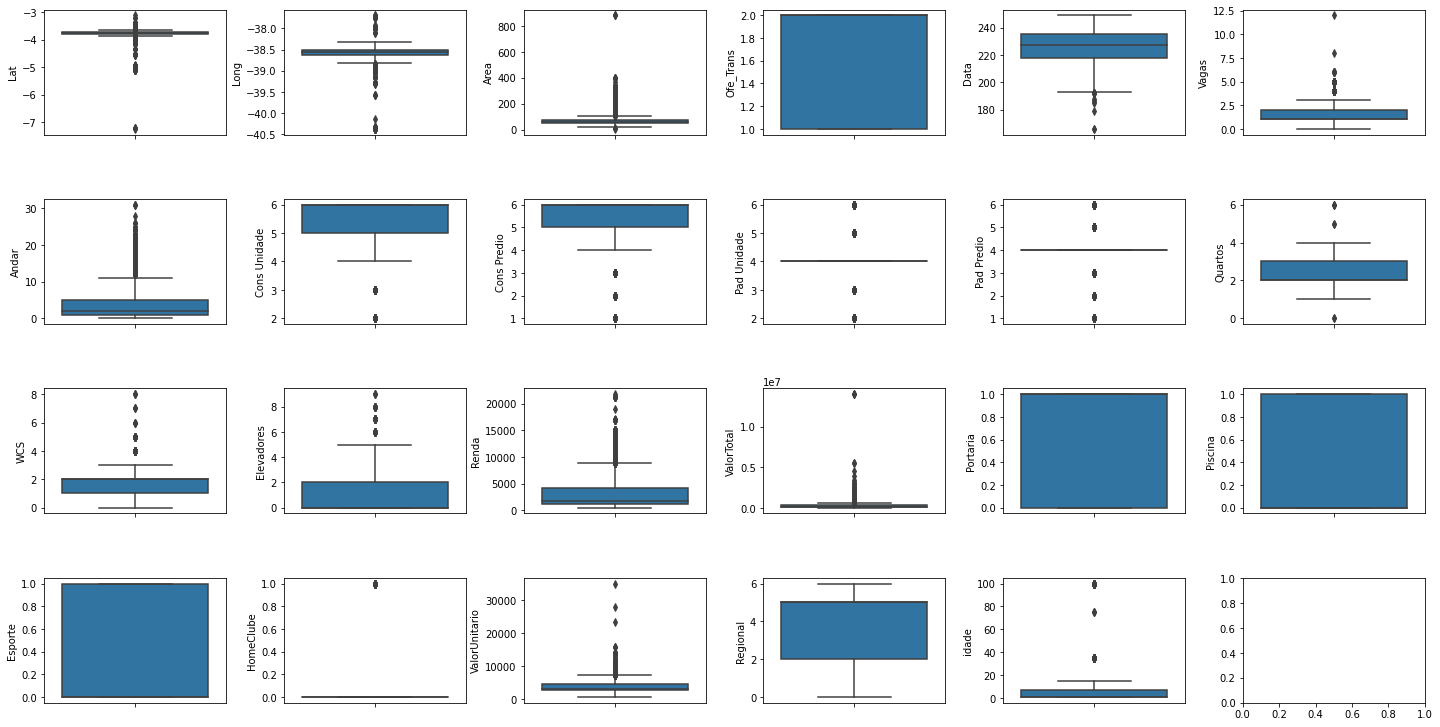

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=6, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##Função de densidade de probabilidade dos atributos



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

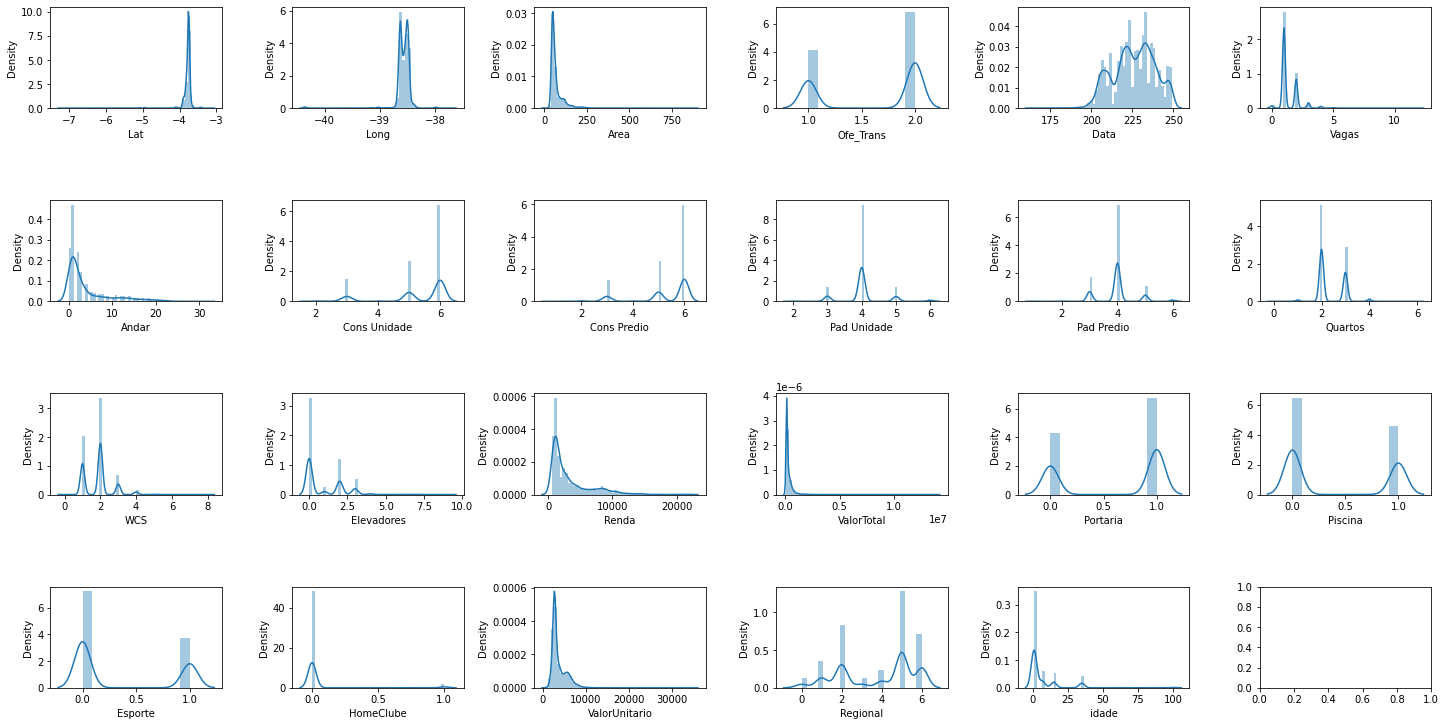

In [ ]:
fig, axs = plt.subplots(ncols=6, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##Mostrando a relação dos atributos com o Valor Unitário, que é a variável alvo

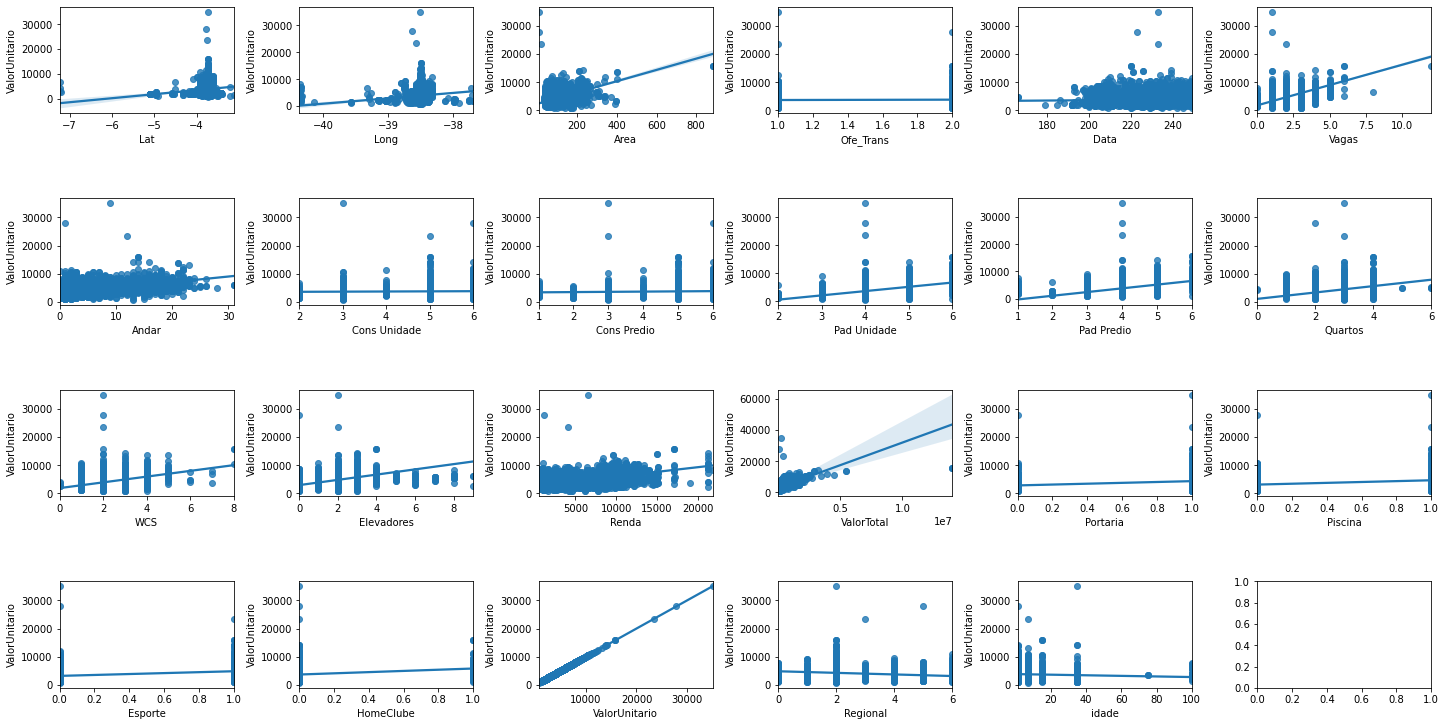

In [ ]:


fig, axs = plt.subplots(ncols=6, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(data.columns):
    sns.regplot(y=data['ValorUnitario'], x=data[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)





##Colocando o Valor Unitario na ultima coluna, para facilitar a visualização e mostrar a matriz de correlações

In [ ]:

vlr=data['ValorUnitario']
data=data.drop(['ValorUnitario'],axis=1)
data['ValorUnitario']=vlr
data.head()

,Lat,Long,Area,Ofe_Trans,Data,Vagas,Andar,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Quartos,WCS,Elevadores,Renda,ValorTotal,Portaria,Piscina,Esporte,HomeClube,Regional,idade,ValorUnitario
0,-3.77,-38.47,62.00,2,211,1.0,1.0,3,3.0,4,4.0,3,3,0.0,1647.50,130000.0,1,0,0,0,6.0,35,2096.77
1,-3.74,-38.49,87.00,2,211,3.0,1.0,5,2.0,4,4.0,3,1,1.0,2733.63,340000.0,1,0,0,0,2.0,1,3908.05
2,-3.71,-38.59,43.83,2,231,1.0,1.0,5,5.0,3,3.0,2,1,0.0,2245.10,150000.0,0,0,1,0,1.0,7,3422.31
3,-3.71,-38.59,43.83,2,231,1.0,1.0,5,5.0,3,3.0,2,2,0.0,2245.10,150000.0,0,0,1,0,1.0,7,3422.31
4,-3.76,-38.44,59.00,1,204,1.0,1.0,6,6.0,5,5.0,2,2,4.0,3301.00,300000.0,1,0,1,0,2.0,1,5119.00


##Matriz de Correlação

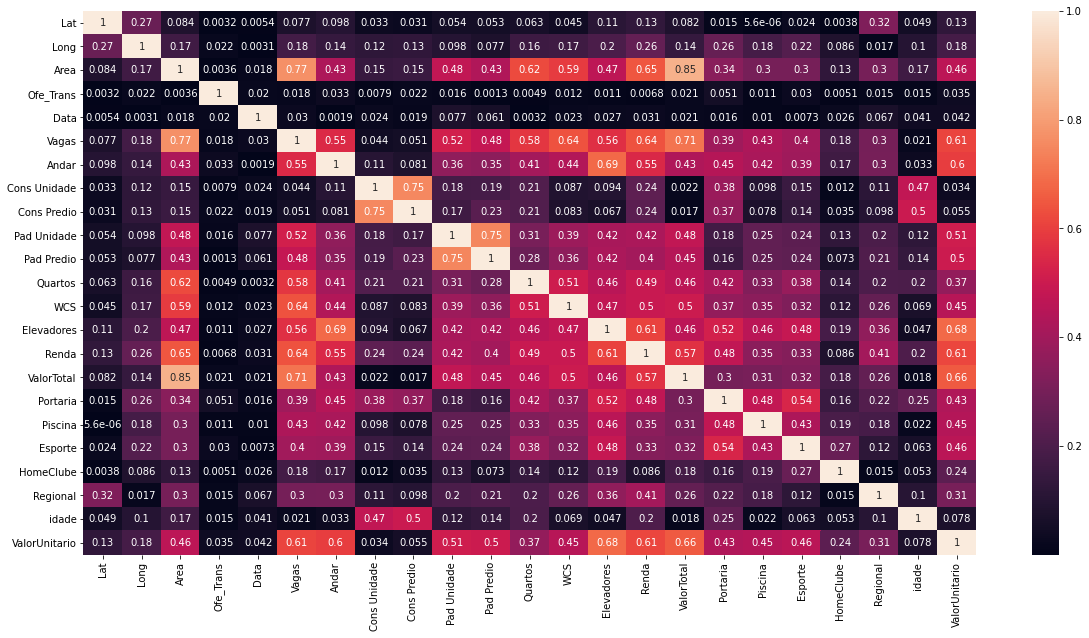

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

##Verifica-se correlações mais fortes com o Valor Unitário das seguintes variáveis:Area, Vagas, Pad Unidade, Pad Predio, WCS, Elevadores, Renda,Portaria, Piscina, Esporte.

## Deixemos assim, por enquanto

##Selecionando os atributos  que tem mais influência segundo os graficos acima

In [ ]:

x=data[['Lat','Long','Area','Vagas','Cons Unidade','Cons Predio','Pad Unidade','Pad Predio','Renda','Piscina','Esporte','idade']]
y=data['ValorUnitario']
x

,Lat,Long,Area,Vagas,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Renda,Piscina,Esporte,idade
0,-3.770000,-38.470000,62.00,1.0,3,3.0,4,4.0,1647.50,0,0,35
1,-3.740000,-38.490000,87.00,3.0,5,2.0,4,4.0,2733.63,0,0,1
2,-3.710000,-38.590000,43.83,1.0,5,5.0,3,3.0,2245.10,0,1,7
3,-3.710000,-38.590000,43.83,1.0,5,5.0,3,3.0,2245.10,0,1,7
4,-3.760000,-38.440000,59.00,1.0,6,6.0,5,5.0,3301.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9641,-3.865750,-38.634117,64.20,1.0,5,5.0,4,4.0,834.41,1,1,1
9642,-3.835833,-38.496835,54.86,2.0,5,5.0,4,4.0,2418.97,1,1,7
9643,-3.812219,-38.519720,47.81,1.0,6,6.0,4,4.0,1609.37,1,1,1
9644,-3.747298,-38.536594,89.96,2.0,6,6.0,4,3.0,4843.00,1,1,1


##Fazendo outra análise gráfica, agora somente com os atributos escolhidos

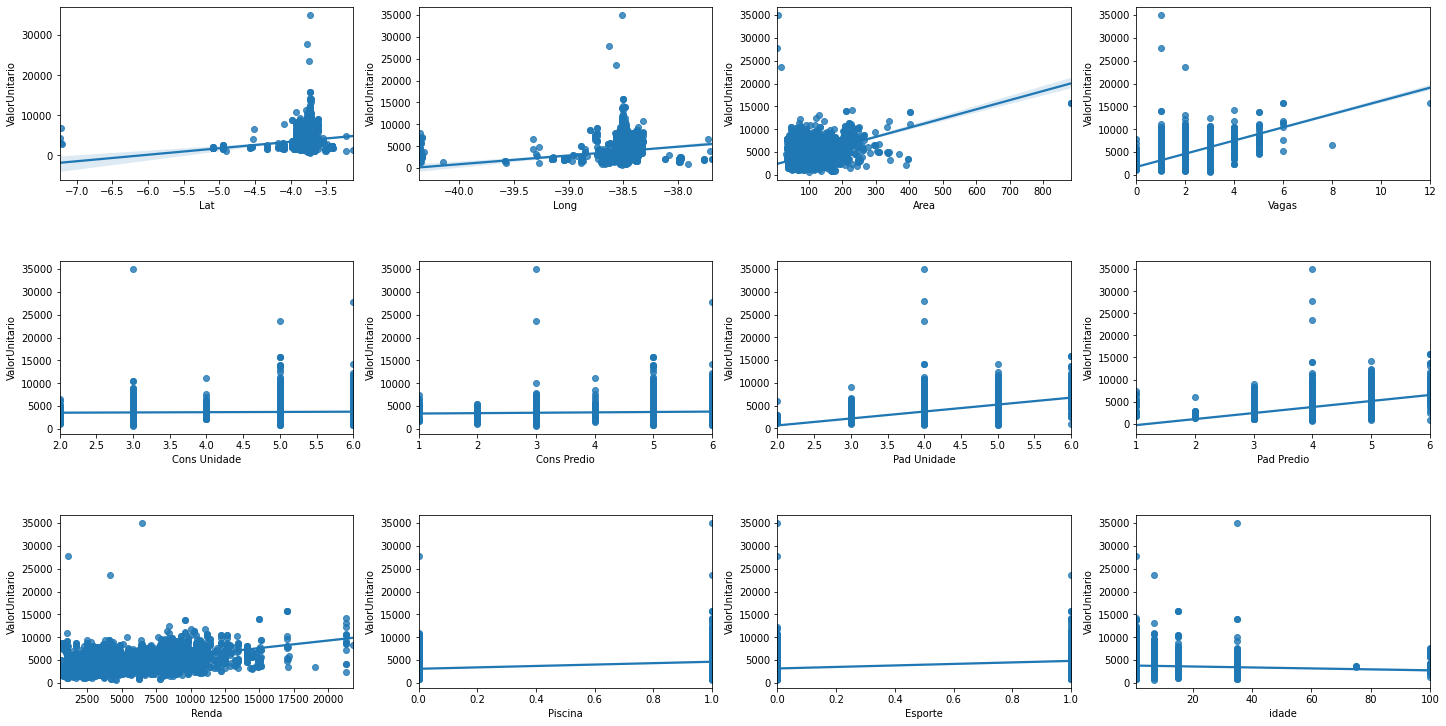

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(x.columns):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

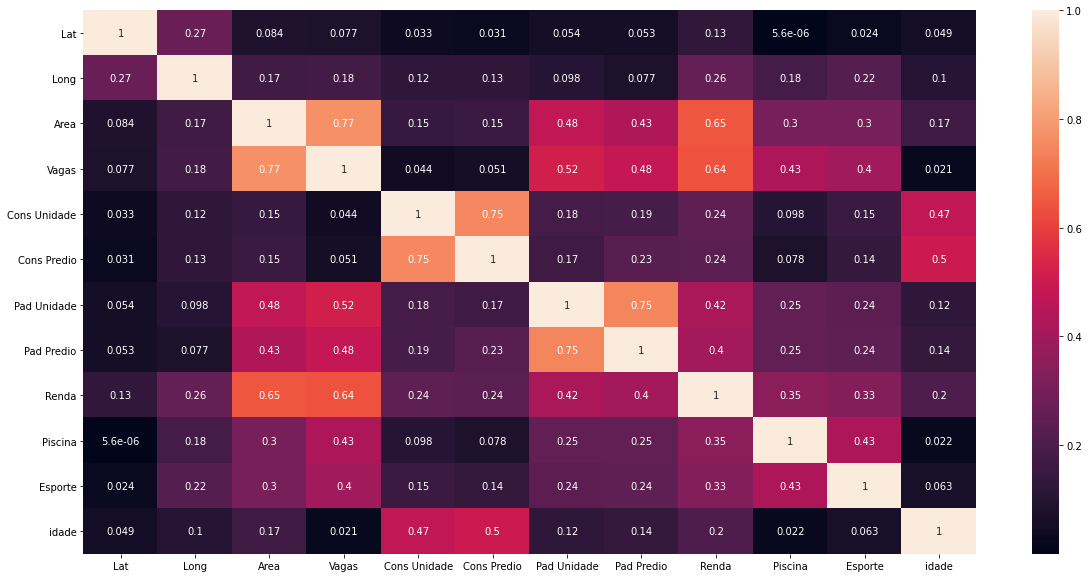

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(x.corr().abs(),  annot=True)

##Verifica-se uma correlação alta entre Padrao do Predio e Padrão da Unidade, bem como entre Área e Vagas. No entanto, esta correlação não é grande o bastante para excluirmos algum destes atributos.

#3 - Escolha do Modelo

In [ ]:
# Import all needed modules
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x.columns

Index(['Lat', 'Long', 'Area', 'Vagas', 'Cons Unidade', 'Cons Predio',
       'Pad Unidade', 'Pad Predio', 'Renda', 'Piscina', 'Esporte', 'idade'],
      dtype='object')

##Separando os dados para Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
y_test

5015    2888.84
1987    2479.50
8521    3123.70
3979    7418.87
4110    6298.67
         ...   
5947    2126.00
8194    6976.74
9174    4743.90
4833    2434.46
1123    4485.36
Name: ValorUnitario, Length: 2406, dtype: float64

##Treinando e Avaliando as métricas de vários modelos

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, max_error

###Regressão Linear 

In [ ]:
l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=2)

l_regression.fit(X_train,y_train)

y_lReg_train = l_regression.predict(X_train)
y_lReg_test = l_regression.predict(X_test)

NMSE_train_score = cross_val_score(l_regression, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_train_score = r2_score(y_train,y_lReg_train)
r2_test_score = r2_score(y_test,y_lReg_test)


#Guardando os scores para análise futura
NMSE_train_score_map = {}
NMSE_train_score_map['RegNMSE_train_score'] = NMSE_train_score.mean()
r2_train_score_map={}
r2_train_score_map['Reg_r2_train_score']=r2_train_score
r2_test_score_map={}
r2_test_score_map['Reg_r2_test_score']=r2_test_score

print(NMSE_train_score_map)
print(r2_train_score_map)
print(r2_test_score_map)


{'RegNMSE_train_score': -1250413.6104580816}
{'Reg_r2_train_score': 0.5825509864308965}
{'Reg_r2_test_score': 0.5986588780487333}


###Observamos acima que não existe overfiting no nosso modelo



###Regressão de Ridge

In [ ]:
l_ridge = linear_model.Ridge()
l_ridge.fit(X_train,y_train)

y_ridge_train = l_ridge.predict(X_train)
y_ridge_test = l_ridge.predict(X_test)

NMSE_train_score = cross_val_score(l_ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_train_score = r2_score(y_train,y_ridge_train)
r2_test_score = r2_score(y_test,y_ridge_test)

NMSE_train_score_map['RidgeNMSE_train_score'] = NMSE_train_score.mean()
r2_train_score_map['Ridge_r2_train_score']=r2_train_score
r2_test_score_map['Ridge_r2_test_score']=r2_test_score

print(NMSE_train_score_map)
print(r2_train_score_map)
print(r2_test_score_map)




{'RegNMSE_train_score': -1250413.6104580816, 'RidgeNMSE_train_score': -1250029.0160547618}
{'Reg_r2_train_score': 0.5825509864308965, 'Ridge_r2_train_score': 0.5825503955776039}
{'Reg_r2_test_score': 0.5986588780487333, 'Ridge_r2_test_score': 0.5987689367609659}


### Regressão Polinomial


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

p_ridge = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
p_ridge.fit(X_train,y_train)

y_poly_train = p_ridge.predict(X_train)
y_poly_test = p_ridge.predict(X_test)

NMSE_train_score = cross_val_score(p_ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_train_score = r2_score(y_train,y_poly_train)
r2_test_score = r2_score(y_test,y_poly_test)

NMSE_train_score_map['Poli_NMSE_train_score'] = NMSE_train_score.mean()
r2_train_score_map['Poli_r2_train_score']=r2_train_score
r2_test_score_map['Poli_r2_test_score']=r2_test_score

print(NMSE_train_score_map)
print(r2_train_score_map)
print(r2_test_score_map)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.82602e-28): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.53525e-28): result may not be accurate.
  overwrite_a=True).T


{'RegNMSE_train_score': -1250413.6104580816, 'RidgeNMSE_train_score': -1250029.0160547618, 'Poli_NMSE_train_score': -7634572.885627957}
{'Reg_r2_train_score': 0.5825509864308965, 'Ridge_r2_train_score': 0.5825503955776039, 'Poli_r2_train_score': 0.7408574336891084}
{'Reg_r2_test_score': 0.5986588780487333, 'Ridge_r2_test_score': 0.5987689367609659, 'Poli_r2_test_score': 0.04959127181288603}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.5826e-28): result may not be accurate.
  overwrite_a=True).T


###Algoritmo SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
svr.fit(X_train,y_train)

y_svr_train = svr.predict(X_train)
y_svr_test = svr.predict(X_test)

NMSE_train_score = cross_val_score(svr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_train_score = r2_score(y_train,y_svr_train)
r2_test_score = r2_score(y_test,y_svr_test)

NMSE_train_score_map['SVR_NMSE_train_score'] = NMSE_train_score.mean()
r2_train_score_map['SVR_r2_train_score']=r2_train_score
r2_test_score_map['SVR_r2_test_score']=r2_test_score

print(NMSE_train_score_map)
print(r2_train_score_map)
print(r2_test_score_map)



{'RegNMSE_train_score': -1250413.6104580816, 'RidgeNMSE_train_score': -1250029.0160547618, 'Poli_NMSE_train_score': -7634572.885627957, 'SVR_NMSE_train_score': -1382374.493300044}
{'Reg_r2_train_score': 0.5825509864308965, 'Ridge_r2_train_score': 0.5825503955776039, 'Poli_r2_train_score': 0.7408574336891084, 'SVR_r2_train_score': 0.7490819006419547}
{'Reg_r2_test_score': 0.5986588780487333, 'Ridge_r2_test_score': 0.5987689367609659, 'Poli_r2_test_score': 0.04959127181288603, 'SVR_r2_test_score': 0.665550107669449}


###Algoritmo Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
dtree = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
dtree.fit(X_train, y_train)

y_dtree_train = dtree.predict(X_train)
y_dtree_test = dtree.predict(X_test)

NMSE_train_score = cross_val_score(dtree, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_train_score = r2_score(y_train,y_dtree_train)
r2_test_score = r2_score(y_test,y_dtree_test)

NMSE_train_score_map['dtree_NMSE_train_score'] = NMSE_train_score.mean()
r2_train_score_map['dtree_r2_train_score']=r2_train_score
r2_test_score_map['dtree_r2_test_score']=r2_test_score

print(NMSE_train_score_map)
print(r2_train_score_map)
print(r2_test_score_map)


{'RegNMSE_train_score': -1250413.6104580816, 'RidgeNMSE_train_score': -1250029.0160547618, 'Poli_NMSE_train_score': -7634572.885627957, 'SVR_NMSE_train_score': -1382374.493300044, 'dtree_NMSE_train_score': -998964.6715431947}
{'Reg_r2_train_score': 0.5825509864308965, 'Ridge_r2_train_score': 0.5825503955776039, 'Poli_r2_train_score': 0.7408574336891084, 'SVR_r2_train_score': 0.7490819006419547, 'dtree_r2_train_score': 0.7781777294179277}
{'Reg_r2_test_score': 0.5986588780487333, 'Ridge_r2_test_score': 0.5987689367609659, 'Poli_r2_test_score': 0.04959127181288603, 'SVR_r2_test_score': 0.665550107669449, 'dtree_r2_test_score': 0.6684592212928031}


###Algoritmo KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
knn = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')

knn.fit(X_train, y_train)
y_knn_train = knn.predict(X_train)
y_knn_test = knn.predict(X_test)

NMSE_train_score = cross_val_score(knn, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_train_score = r2_score(y_train,y_knn_train)
r2_test_score = r2_score(y_test,y_knn_test)

NMSE_train_score_map['knn_NMSE_train_score'] = NMSE_train_score.mean()
r2_train_score_map['knn_r2_train_score']=r2_train_score
r2_test_score_map['knn_r2_test_score']=r2_test_score

print(NMSE_train_score_map)
print(r2_train_score_map)
print(r2_test_score_map)


{'RegNMSE_train_score': -1250413.6104580816, 'RidgeNMSE_train_score': -1250029.0160547618, 'Poli_NMSE_train_score': -7634572.885627957, 'SVR_NMSE_train_score': -1382374.493300044, 'dtree_NMSE_train_score': -998964.6715431947, 'knn_NMSE_train_score': -1393102.9594824612}
{'Reg_r2_train_score': 0.5825509864308965, 'Ridge_r2_train_score': 0.5825503955776039, 'Poli_r2_train_score': 0.7408574336891084, 'SVR_r2_train_score': 0.7490819006419547, 'dtree_r2_train_score': 0.7781777294179277, 'knn_r2_train_score': 0.8879579284669442}
{'Reg_r2_test_score': 0.5986588780487333, 'Ridge_r2_test_score': 0.5987689367609659, 'Poli_r2_test_score': 0.04959127181288603, 'SVR_r2_test_score': 0.665550107669449, 'dtree_r2_test_score': 0.6684592212928031, 'knn_r2_test_score': 0.7259050427421975}


###Algoritmo Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='mean_squared_error')
gbr = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')

gbr.fit(X_train,y_train)
y_gbr_train = gbr.predict(X_train)
y_gbr_test = gbr.predict(X_test)

NMSE_train_score = cross_val_score(gbr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_train_score = r2_score(y_train,y_gbr_train)
r2_test_score = r2_score(y_test,y_gbr_test)

NMSE_train_score_map['gbr_NMSE_train_score'] = NMSE_train_score.mean()
r2_train_score_map['gbr_r2_train_score']=r2_train_score
r2_test_score_map['gbr_r2_test_score']=r2_test_score

print(NMSE_train_score_map)
print(r2_train_score_map)
print(r2_test_score_map)




{'RegNMSE_train_score': -1250413.6104580816, 'RidgeNMSE_train_score': -1250029.0160547618, 'Poli_NMSE_train_score': -7634572.885627957, 'SVR_NMSE_train_score': -1382374.493300044, 'dtree_NMSE_train_score': -998964.6715431947, 'knn_NMSE_train_score': -1393102.9594824612, 'gbr_NMSE_train_score': -839883.885592123}
{'Reg_r2_train_score': 0.5825509864308965, 'Ridge_r2_train_score': 0.5825503955776039, 'Poli_r2_train_score': 0.7408574336891084, 'SVR_r2_train_score': 0.7490819006419547, 'dtree_r2_train_score': 0.7781777294179277, 'knn_r2_train_score': 0.8879579284669442, 'gbr_r2_train_score': 0.8774404180966817}
{'Reg_r2_test_score': 0.5986588780487333, 'Ridge_r2_test_score': 0.5987689367609659, 'Poli_r2_test_score': 0.04959127181288603, 'SVR_r2_test_score': 0.665550107669449, 'dtree_r2_test_score': 0.6684592212928031, 'knn_r2_test_score': 0.7259050427421975, 'gbr_r2_test_score': 0.7880796455860296}


##Analisando gráficamente os resultados

###Scores NMSE - Negative mean squared erro com dados de treino




(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

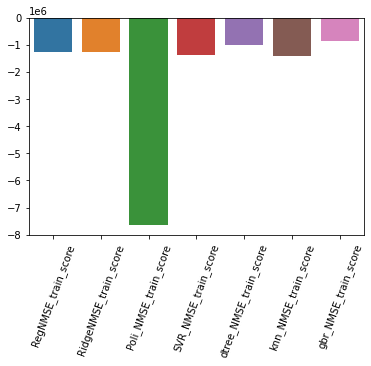

In [ ]:
NMSE_train_scores = pd.DataFrame([NMSE_train_score_map])

sns.barplot(data=NMSE_train_scores)
plt.xticks(rotation=70)

###Score R2 para dados de treino

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

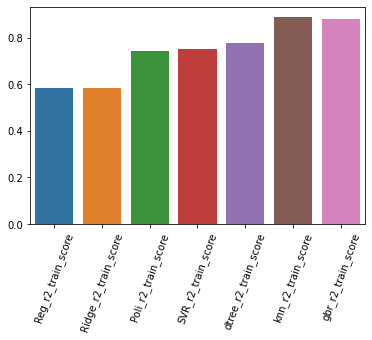

In [ ]:
r2_train_scores = pd.DataFrame([r2_train_score_map])

sns.barplot(data=r2_train_scores)
plt.xticks(rotation=70)

###Score R2 para dads de teste

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

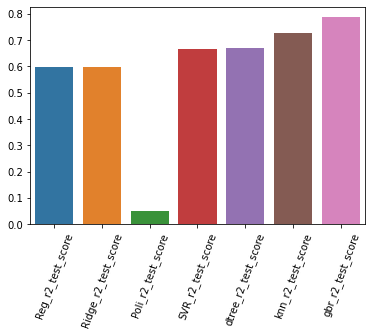

In [ ]:
r2_test_scores = pd.DataFrame([r2_test_score_map])

sns.barplot(data=r2_test_scores)
plt.xticks(rotation=70)

###Observamos pelo Score R2 que Regressão Polinomial Ridge produz Overfiting. vamos excluir para melhor comparar os demais scores

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

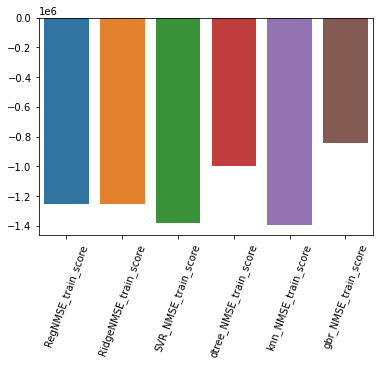

In [ ]:
NMSE_train_scores = pd.DataFrame([NMSE_train_score_map])
NMSE_train_scores.drop(['Poli_NMSE_train_score'],axis=1,inplace=True)
sns.barplot(data=NMSE_train_scores)
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

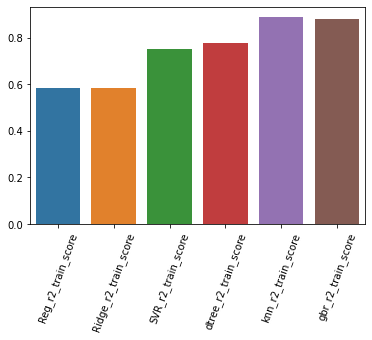

In [ ]:
r2_train_scores = pd.DataFrame([r2_train_score_map])
r2_train_scores.drop(['Poli_r2_train_score'],axis=1,inplace=True)
sns.barplot(data=r2_train_scores)
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

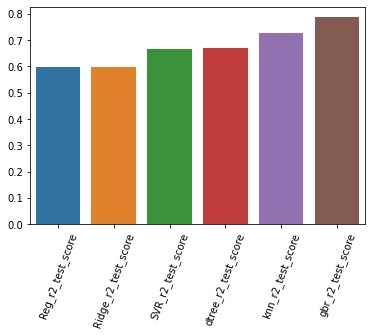

In [ ]:
r2_test_scores = pd.DataFrame([r2_test_score_map])
r2_test_scores.drop(['Poli_r2_test_score'],axis=1,inplace=True)
sns.barplot(data=r2_test_scores)
plt.xticks(rotation=70)

#4 - Conclusões - O modelo escolhido será o Gradient Boosting Regressor




##Comparando os dados reais com dados preditos 

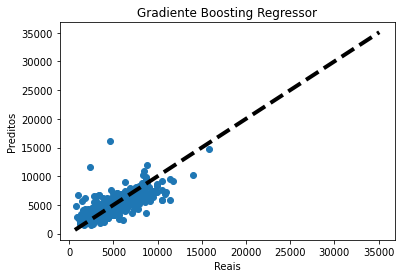

In [ ]:

fig, ax = plt.subplots()
ax.scatter(y_test, y_gbr_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Gradiente Boosting Regressor')
ax.set_xlabel('Reais')
ax.set_ylabel('Preditos')
plt.show()

#5- Resultados



##Fazendo a predição para imóvel no bairro do Meireles em Fortaleza

In [ ]:

x_apto = pd.DataFrame({'Lat':-3.72714,'Long':-38.49946,'Area':150,'Vagas':3,'Cons Unidade':5,'Cons Predio':4,'Pad Unidade':5,'Pad Predio':4,'Renda':9323, 'Piscina':0,'Esporte':'0','idade':22},index = range(1))
x_apto


,Lat,Long,Area,Vagas,Cons Unidade,Cons Predio,Pad Unidade,Pad Predio,Renda,Piscina,Esporte,idade
0,-3.72714,-38.49946,150,3,5,4,5,4,9323,0,0,22


In [ ]:
vlr_unitario = gbr.predict(x_apto)

print('Valor Unitário Médio:R$ %000.000f,00/m2'% (vlr_unitario))


Valor Unitário Médio:R$ 5316,00/m2


In [ ]:
print('O Valor do imóvel calculado com Gradient Boosting Regressor:R$ %000.000f,00'% (x_apto['Area']*vlr_unitario))


O Valor do imóvel calculado com Gradient Boosting Regressor:R$ 797400,00


##Calculando o Valor Unitário com a média todos os modelos

In [ ]:
resultados={}
resultados['Linear']=l_regression.predict(x_apto)
resultados['Linear Ridge ']=l_ridge.predict(x_apto)
resultados['SVR']=svr.predict(x_apto)
resultados['Decison Tree']=dtree.predict(x_apto)
resultados['KNN']=knn.predict(x_apto)
resultados['Gradiente Boosting']=gbr.predict(x_apto)
resultados = pd.DataFrame.from_dict(resultados)
resultados

,Linear,Linear Ridge,SVR,Decison Tree,KNN,Gradiente Boosting
0,5126.857625,5126.755361,4013.769564,4043.923908,6709.415,5316.002724


##Plotando os Valores Unitários

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

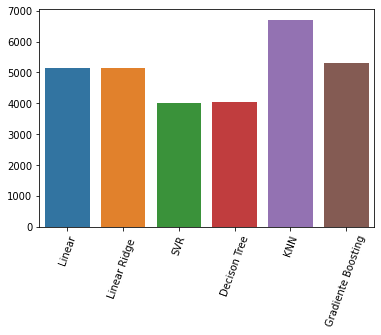

In [ ]:
#r2_test_scores = pd.DataFrame([r2_test_score_map])
#r2_test_scores.drop(['P_Ridge_r2_test_score'],axis=1,inplace=True)
sns.barplot(data=resultados)
plt.xticks(rotation=70)

##Calculando o Valor Unitário Médio 

In [ ]:
vlr_unitario = resultados.T.mean()




In [ ]:
print('Valor Unitário Médio:R$ %000.000f,00/m2'% (vlr_unitario))


Valor Unitário Médio:R$ 5056,00/m2


In [ ]:
print('O Valor do imóvel calculado com Gradient Boosting Regressor:R$ %000.000f,00'% (x_apto['Area']*vlr_unitario))


O Valor do imóvel calculado com Gradient Boosting Regressor:R$ 758418,00
